# Imports and Data Download: 

- Import necessary libraries and download datasets from drive 

In [ ]:
!pip3 install spacytextblob

import pandas as pd 
import seaborn as sns 
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime 
import spacy 
from spacytextblob.spacytextblob import SpacyTextBlob 
from numbers import Real
import time 
import operator 
import itertools
from datetime import timedelta
from matplotlib.colors import ListedColormap 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# High/Low Tide Data
url = 'https://drive.google.com/file/d/1rr9S1yTxbNpM_jkT6puPYrRSVSJGzWU1/view?usp=sharing'
path ='https://drive.google.com/uc?id=' + url.split('/')[-2]
HLTides = pd.read_csv(path)
# print("HLTides: \n", HLTides.head())

# hourly Tide Data
url = 'https://drive.google.com/file/d/1wXz4erOcSXJkYB367PTugQ7sfQsqqQAc/view?usp=sharing'
path ='https://drive.google.com/uc?id=' + url.split('/')[-2]
hourlyTides = pd.read_csv(path)
# print("hourlyTides: \n", hourlyTides.head())

# king County Storm Data
url = 'https://drive.google.com/file/d/1VrovTDQax0d2RUUyg-QLuhOwifgquUnJ/view?usp=sharing'
path ='https://drive.google.com/uc?id=' + url.split('/')[-2]
kingStormData = pd.read_csv(path)
# print("kingStormData: \n", kingStormData.head())

# eartquake Data
url = 'https://drive.google.com/file/d/1RLHFNtZ31yyosqsFXTcDDlhgpZuMB6Bf/view?usp=sharing'
path ='https://drive.google.com/uc?id=' + url.split('/')[-2]
earthquakes = pd.read_csv(path)
# print("earthquakes: \n", earthquakes.head())


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Begin Curation: 

- Define functions to create datetime objects for relevant columns of dataframes
- Curate both dataframes by year 

In [ ]:
# print("hourlyTides: ")
# display(hourlyTides)
# print("\n")
# print("earthquakes: ")
# display(earthquakes)

In [ ]:
def clean_starttime(df):
  """
  Translates dates to Datetime objects. 
  Adds columns Date: Datetime, month: int, year: int, day: int.
  """

  format = {1: "%Y-%m-%d %H:%M:%S"}
  dates = []
  bad = []
  for i, date in enumerate(df['starttime']):
    try:
      if 1 == 1: # date[0].isdigit():
        f = format[1]
      dates.append(datetime.strptime(date.strip(), f))  
    except:
      bad.append([date, format, i])

  print(bad)
  df = df.drop([b[-1] for b in bad])
  df['starttime'] = dates
  df['year'] = pd.DatetimeIndex(dates).year
  df['month'] = pd.DatetimeIndex(dates).month
  df['day'] = pd.DatetimeIndex(dates).day
  df['hour'] = pd.DatetimeIndex(dates).hour
  df['minute'] = pd.DatetimeIndex(dates).minute
  df['second'] = pd.DatetimeIndex(dates).second
  return df

def clean_TideDate(df):
  """
  Translates date column of tide data to Datetime objects.
  Adds Date, year, month, and day columns to dataset.
  """

  format = {1: "%Y/%m/%d"}
  dates = []
  bad = []
  for i, date in enumerate(df['Date']):
    try:
      if 1 == 1: # date[0].isdigit():
        f = format[1]
      dates.append(datetime.strptime(date.strip(), f))  
    except:
      bad.append([date, format, i])
  print(bad)
  df = df.drop([b[-1] for b in bad])
  df['Date'] = dates
  df['year'] = pd.DatetimeIndex(dates).year
  df['month'] = pd.DatetimeIndex(dates).month
  df['day'] = pd.DatetimeIndex(dates).day
  return df

def clean_TideTime(df):
  """
  Translates time column of tide data to Datetime object.
  Adds hour, and minute columns to dataset. 
  """

  format = {1: "%H:%M"}
  times = []
  bad = []
  for i, date in enumerate(df['Time (LST/LDT)']):
    try:
      if 1 == 1: # date[0].isdigit():
        f = format[1]
      temp = datetime.strptime(date.strip(), f)
      times.append(temp.time().isoformat())
    except:
      bad.append([date, format, i])
  print(bad)
  df = df.drop([b[-1] for b in bad])
  df['Time (LST/LDT)'] = times
  df['hour'] = pd.DatetimeIndex(times).hour
  df['minute'] = pd.DatetimeIndex(times).minute
  return df


In [ ]:
# pair down earthquake data to correct date range
curateYearEarthQuake = earthquakes[earthquakes['starttime'].str.contains('2021')]
# pair down tide data to correct date range
curateYearTide = hourlyTides[hourlyTides['Date'].str.contains('2021')]

# Begin Cleaning DateTimes

- Utilize datetime functions above to clean datasets

In [ ]:
# Clean earthquake start time 
EarthQuakeCleanTime = clean_starttime(curateYearEarthQuake)
del EarthQuakeCleanTime['lat']
del EarthQuakeCleanTime['lon']
# Re-order columns 
newOrder = [1,0,2,3,4,5,6,7,8,9]
EarthQuakeCleanTime = EarthQuakeCleanTime[EarthQuakeCleanTime.columns[newOrder]]
print("EarthQuakeCleanTime: ")
display(EarthQuakeCleanTime)
print('\n')

# Clean tide date and hour 
TideCleanDate = clean_TideDate(curateYearTide)
TideCleanTime = clean_TideTime(TideCleanDate)
del TideCleanTime['Preliminary (ft)']
print("TideCleanTime: ")
display(TideCleanTime)

[]
EarthQuakeCleanTime: 


,starttime,depth,energy,duration,year,month,day,hour,minute,second
70033,2021-09-30 10:40:00,30.000000,587020.601998,300.0,2021,9,30,10,40,0
70034,2021-09-30 10:42:30,22.068966,242324.324032,150.0,2021,9,30,10,42,30
70035,2021-09-30 10:45:00,20.000000,229341.126883,150.0,2021,9,30,10,45,0
70036,2021-09-30 11:05:00,20.689655,823492.012366,300.0,2021,9,30,11,5,0
70037,2021-09-30 11:07:30,30.000000,482821.046109,150.0,2021,9,30,11,7,30
...,...,...,...,...,...,...,...,...,...,...
308859,2021-12-31 03:15:00,59.310345,22514.340037,300.0,2021,12,31,3,15,0
308860,2021-12-31 03:17:30,60.000000,13582.252306,150.0,2021,12,31,3,17,30
308861,2021-12-31 03:35:00,53.103448,44057.899248,300.0,2021,12,31,3,35,0
308862,2021-12-31 03:37:30,34.615385,22065.052985,150.0,2021,12,31,3,37,30




[]
[]
TideCleanTime: 


,Date,Time (LST/LDT),Predicted (ft),Verified (ft),year,month,day,hour,minute
0,2021-01-01,00:00:00,-2.092,-1.74,2021,1,1,0,0
1,2021-01-01,01:00:00,-0.965,-0.47,2021,1,1,1,0
2,2021-01-01,02:00:00,1.369,1.77,2021,1,1,2,0
3,2021-01-01,03:00:00,4.324,4.75,2021,1,1,3,0
4,2021-01-01,04:00:00,7.324,7.69,2021,1,1,4,0
...,...,...,...,...,...,...,...,...,...
8755,2021-12-31,19:00:00,0.137,0.16,2021,12,31,19,0
8756,2021-12-31,20:00:00,-1.987,-1.97,2021,12,31,20,0
8757,2021-12-31,21:00:00,-2.679,-2.7,2021,12,31,21,0
8758,2021-12-31,22:00:00,-1.791,-1.74,2021,12,31,22,0


In [ ]:
# Create matching starttime column for combining dataframes 
startTimes = []
i = 0
for index, row in TideCleanTime.iterrows():
  dateString = str(TideCleanTime.at[i,"Date"])
  tempStr = (dateString[0 : 10] + " " + str(TideCleanTime.at[i, 'Time (LST/LDT)']))
  startTimes.append(tempStr)
  i += 1

TideCleanTime.insert(0, 'starttime', startTimes)

display(TideCleanTime)


,starttime,Date,Time (LST/LDT),Predicted (ft),Verified (ft),year,month,day,hour,minute
0,2021-01-01 00:00:00,2021-01-01,00:00:00,-2.092,-1.74,2021,1,1,0,0
1,2021-01-01 01:00:00,2021-01-01,01:00:00,-0.965,-0.47,2021,1,1,1,0
2,2021-01-01 02:00:00,2021-01-01,02:00:00,1.369,1.77,2021,1,1,2,0
3,2021-01-01 03:00:00,2021-01-01,03:00:00,4.324,4.75,2021,1,1,3,0
4,2021-01-01 04:00:00,2021-01-01,04:00:00,7.324,7.69,2021,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,2021-12-31,19:00:00,0.137,0.16,2021,12,31,19,0
8756,2021-12-31 20:00:00,2021-12-31,20:00:00,-1.987,-1.97,2021,12,31,20,0
8757,2021-12-31 21:00:00,2021-12-31,21:00:00,-2.679,-2.7,2021,12,31,21,0
8758,2021-12-31 22:00:00,2021-12-31,22:00:00,-1.791,-1.74,2021,12,31,22,0


# Consolidate Dataframes: 

- Combine both dataframes into one for machine learning. 
- Format consolidated dataframe 

In [ ]:
format = {1: "%Y-%m-%d %H:%M:%S"}
f = format[1]
start_date = '2021-01-1 00:00:00'
end_date = '2021-01-1 01:00:00'
start = (datetime.strptime(start_date.strip(), f))
end = (datetime.strptime(end_date.strip(), f))

m = 1 
d = 1
h = 0

hourlyAverageDf = pd.DataFrame(columns = ['starttime', 'depth', 'energy', 'duration', 'year',	'month',	'day',	'hour'])

# Nested while loops iterate over every hour of every month, and append to hourlyAverage dataframe 
# +++++++++++++++++++++++++++++++++++++++++++
while m <= 12:  
  print("month: ", m)
  curStartMonth = start.month
  curEndMonth = end.month
  if m == 2:
    numDays = 28 
  elif m in (1, 3, 5, 7, 8, 10, 12):
    numDays = 31
  else:
    numDays = 30 
  # -----------------------------------------
  while d < numDays: 
    # print('DAY:   start: ', start, 'end: ', end)
    curStartDay = start.day
    curEndDay = end.day
    # =======================================
    while h <= 23: 
      curStartHour = start.hour
      curEndHour = end.hour
      df2 = EarthQuakeCleanTime.query('starttime >= @start and starttime <= @end')
      avgDur = df2['duration '].mean()
      avgDepth = df2['depth'].mean()
      averageEng = df2['energy'].mean()
      curRow = {'starttime': start, 'depth':avgDepth,	'energy':averageEng, 'duration': avgDur,	'year':start.year,	'month':start.month,	'day':start.day,	'hour':start.hour}
      hourlyAverageDf = hourlyAverageDf.append(curRow, ignore_index = True)
      if h < 22: 
        start = start.replace(hour = curStartHour + 1 )
        end = end.replace(hour = curEndHour + 1 )
      else:
        start = start.replace(hour = curEndHour )
        end = end.replace(hour = 0)
      h += 1
    # =======================================
    h = 0 
    start = start.replace(hour = 0 )
    end = end.replace(hour = 1)
    if start.month == 2:
      if d < 27: 
        start = start.replace(day = curStartDay + 1 )
        end = end.replace(day = curEndDay + 1 )
    elif start.month  in (1, 3, 5, 7, 8, 10, 12):
      if d < 30: 
        start = start.replace(day = curStartDay + 1 )
        end = end.replace(day = curEndDay + 1 )
    else: 
      if d < 29: 
        start = start.replace(day = curStartDay + 1 )
        end = end.replace(day = curEndDay + 1 )
    # print('\n') 
    d += 1
  # -----------------------------------------
  d = 1
  start = start.replace(hour = 0 )
  end = end.replace(hour = 1)
  start = start.replace(day = 1 )
  end = end.replace(day = 1)

  if m < 12: 
    start = start.replace(month = curStartMonth + 1 )
    end = end.replace(month = curEndMonth + 1 )

  m += 1
# +++++++++++++++++++++++++++++++++++++++++++
display(hourlyAverageDf)


month:  1
month:  2
month:  3
month:  4
month:  5
month:  6
month:  7
month:  8
month:  9
month:  10
month:  11
month:  12


,starttime,depth,energy,duration,year,month,day,hour
0,2021-01-01 00:00:00,NaN,NaN,NaN,2021,1,1,0
1,2021-01-01 01:00:00,NaN,NaN,NaN,2021,1,1,1
2,2021-01-01 02:00:00,NaN,NaN,NaN,2021,1,1,2
3,2021-01-01 03:00:00,NaN,NaN,NaN,2021,1,1,3
4,2021-01-01 04:00:00,NaN,NaN,NaN,2021,1,1,4
...,...,...,...,...,...,...,...,...
8467,2021-12-30 19:00:00,NaN,NaN,NaN,2021,12,30,19
8468,2021-12-30 20:00:00,NaN,NaN,NaN,2021,12,30,20
8469,2021-12-30 21:00:00,NaN,NaN,NaN,2021,12,30,21
8470,2021-12-30 22:00:00,30.753316,100860.876606,270.0,2021,12,30,22


In [ ]:
TideCleanTime.starttime = pd.to_datetime(TideCleanTime.starttime)
hourlyAverageDf.starttime = pd.to_datetime(hourlyAverageDf.starttime)
combinedDf = pd.merge(TideCleanTime, hourlyAverageDf, how = 'inner', on = 'starttime')
del combinedDf['year_x']
del combinedDf['month_x']
del combinedDf['day_x']
del combinedDf['hour_x']
del combinedDf['minute']

display(combinedDf)

,starttime,Date,Time (LST/LDT),Predicted (ft),Verified (ft),depth,energy,duration,year_y,month_y,day_y,hour_y
0,2021-01-01 00:00:00,2021-01-01,00:00:00,-2.092,-1.74,NaN,NaN,NaN,2021,1,1,0
1,2021-01-01 01:00:00,2021-01-01,01:00:00,-0.965,-0.47,NaN,NaN,NaN,2021,1,1,1
2,2021-01-01 02:00:00,2021-01-01,02:00:00,1.369,1.77,NaN,NaN,NaN,2021,1,1,2
3,2021-01-01 03:00:00,2021-01-01,03:00:00,4.324,4.75,NaN,NaN,NaN,2021,1,1,3
4,2021-01-01 04:00:00,2021-01-01,04:00:00,7.324,7.69,NaN,NaN,NaN,2021,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8467,2021-12-30 19:00:00,2021-12-30,19:00:00,-0.328,0.17,NaN,NaN,NaN,2021,12,30,19
8468,2021-12-30 20:00:00,2021-12-30,20:00:00,-1.346,-0.73,NaN,NaN,NaN,2021,12,30,20
8469,2021-12-30 21:00:00,2021-12-30,21:00:00,-0.933,-0.22,NaN,NaN,NaN,2021,12,30,21
8470,2021-12-30 22:00:00,2021-12-30,22:00:00,0.709,1.22,30.753316,100860.876606,270.0,2021,12,30,22


# Machine Learning: 

- Drop null values from dataframe 
- Train model on dataset 

In [ ]:
import sklearn 
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
print(f'Number of null values pre dropna: {combinedDf.energy.isnull().sum()}')
finalDf = combinedDf.dropna()
# display(finalDf)
print(f'Number of null values post dropna: {finalDf.energy.isnull().sum()}')

Number of null values pre dropna: 4805
Number of null values post dropna: 0


In [ ]:
# adjust names of columns and reset index of dataframe 

finalDf.rename(columns = {"Verified (ft)": "verified"}, 
          inplace = True)
finalDf.rename(columns = {"Predicted (ft)": "predicted"}, 
          inplace = True)
finalDf.rename(columns = {"Time (LST/LDT)": "time"}, 
          inplace = True)
finalDf.rename(columns = {"year_y": "year"}, 
          inplace = True)
finalDf.rename(columns = {"month_y": "month"}, 
          inplace = True)
finalDf.rename(columns = {"day_y": "day"}, 
          inplace = True)
finalDf.rename(columns = {"hour_y": "year"}, 
          inplace = True)
finalDf.rename(columns = {"Date": "date"}, 
          inplace = True)

finalDf.reset_index(inplace = True)
finalDf = finalDf.drop('index', axis = 1)
display(finalDf)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,starttime,date,time,predicted,verified,depth,energy,duration,year,month,day,year
0,2021-01-07 13:00:00,2021-01-07,13:00:00,10.708,11.13,38.982840,48211.808283,219.230769,2021,1,7,13
1,2021-01-07 14:00:00,2021-01-07,14:00:00,8.754,9.29,38.871473,58232.311187,245.454545,2021,1,7,14
2,2021-01-07 15:00:00,2021-01-07,15:00:00,6.416,6.9,51.034483,47799.239794,300.000000,2021,1,7,15
3,2021-01-07 16:00:00,2021-01-07,16:00:00,4.1,4.53,29.264693,79515.375246,216.666667,2021,1,7,16
4,2021-01-07 17:00:00,2021-01-07,17:00:00,2.337,2.74,46.666667,65688.275745,200.000000,2021,1,7,17
...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2021-12-29 14:00:00,2021-12-29,14:00:00,10.658,10.59,60.000000,62880.368140,300.000000,2021,12,29,14
3663,2021-12-30 01:00:00,2021-12-30,01:00:00,8.958,9.25,27.920424,40115.326403,300.000000,2021,12,30,1
3664,2021-12-30 02:00:00,2021-12-30,02:00:00,9.645,9.85,30.495509,69159.143355,229.411765,2021,12,30,2
3665,2021-12-30 03:00:00,2021-12-30,03:00:00,9.679,9.98,39.421859,56456.384971,230.000000,2021,12,30,3


In [ ]:
# check for '-' value in verified tide column that can not be converted to float

i = 0
for index, row in finalDf.iterrows():
  try:
    verified = str(finalDf.at[i,"verified"])
    if str(finalDf.at[i,"verified"]) == '-':
      finalDf = finalDf.drop(index=i)
      print("DROPPED")
    # print(verified)
  except:
    print("except")
  i += 1

display(finalDf)

DROPPED


,starttime,date,time,predicted,verified,depth,energy,duration,year,month,day,year
0,2021-01-07 13:00:00,2021-01-07,13:00:00,10.708,11.13,38.982840,48211.808283,219.230769,2021,1,7,13
1,2021-01-07 14:00:00,2021-01-07,14:00:00,8.754,9.29,38.871473,58232.311187,245.454545,2021,1,7,14
2,2021-01-07 15:00:00,2021-01-07,15:00:00,6.416,6.9,51.034483,47799.239794,300.000000,2021,1,7,15
3,2021-01-07 16:00:00,2021-01-07,16:00:00,4.1,4.53,29.264693,79515.375246,216.666667,2021,1,7,16
4,2021-01-07 17:00:00,2021-01-07,17:00:00,2.337,2.74,46.666667,65688.275745,200.000000,2021,1,7,17
...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2021-12-29 14:00:00,2021-12-29,14:00:00,10.658,10.59,60.000000,62880.368140,300.000000,2021,12,29,14
3663,2021-12-30 01:00:00,2021-12-30,01:00:00,8.958,9.25,27.920424,40115.326403,300.000000,2021,12,30,1
3664,2021-12-30 02:00:00,2021-12-30,02:00:00,9.645,9.85,30.495509,69159.143355,229.411765,2021,12,30,2
3665,2021-12-30 03:00:00,2021-12-30,03:00:00,9.679,9.98,39.421859,56456.384971,230.000000,2021,12,30,3


In [ ]:
# finalDf['starttime']=finalDf['starttime'].astype(str)
# finalDf['date']=finalDf['date'].astype(str)
# stTime = OneHotEncoder().fit_transform(finalDf[['starttime']]).toarray()
# date = OneHotEncoder().fit_transform(finalDf[['date']]).toarray()

X = finalDf.loc[:, ['depth', 'energy', 'duration', 'year', 'month', 'day']].to_numpy() 
print('x shape: ', X.shape)
Y = finalDf.loc[:, ['verified']].to_numpy()
print('y shape: ', Y.shape)

xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1, random_state = 5)
xTrain, xVal, yTrain, yVal = sklearn.model_selection.train_test_split(xTrain, yTrain, test_size = 1.0/9.0, random_state = 5)
xNorm = sklearn.preprocessing.RobustScaler().fit(xTrain)
yNorm = sklearn.preprocessing.RobustScaler().fit(yTrain)
xTrain, xVal, xTest = [xNorm.transform(x) for x in [xTrain, xVal, xTest]]
yTrain, yVal, yTest = [yNorm.transform(y) for y in [yTrain, yVal, yTest]]

xFeatures = xTrain
model = linear_model.LinearRegression()
model.fit(xFeatures, yTrain)
yhat = model.predict(xVal)
trainScore = model.score(xTrain, yTrain)

print('train score:', trainScore)
print('r2: ', r2_score(yNorm.inverse_transform(yVal), yNorm.inverse_transform(yhat)))
print('mse:', mean_squared_error(yNorm.inverse_transform(yVal), yNorm.inverse_transform(yhat), squared=False))
print('mae:', mean_absolute_error(yNorm.inverse_transform(yVal), yNorm.inverse_transform(yhat)))

x shape:  (3666, 7)
y shape:  (3666, 1)
train score: 0.004409835733663492
r2:  0.0007926096955240824
mse: 3.5967749275041614
mae: 3.033213995190709


# Machine Learning Graphs: 

- Display machine learning graphs 

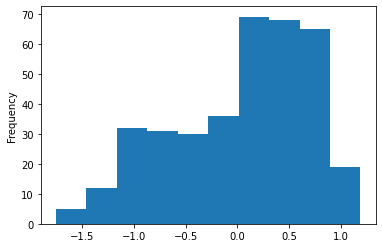

In [ ]:
# looking for bell curve with mean near zero 
residual = (yVal - yhat).reshape(-1)
pd.Series(residual).plot.hist()

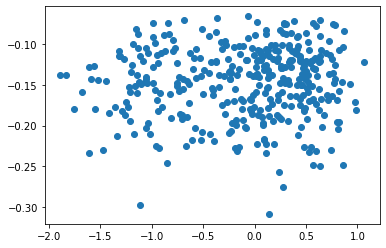

In [ ]:
# looking for roughly linear relation
plt.scatter(yVal.reshape(-1), yhat.reshape(-1))

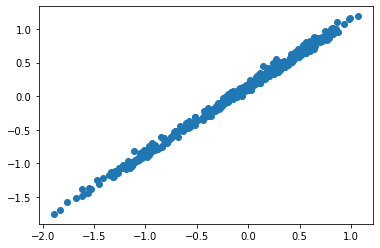

In [ ]:
# looking for no visible pattern or correlation
plt.scatter(yVal.reshape(-1), residual)

# Evaluation on the Test Set: 

- Evaluate model on the test set 

In [ ]:
# ---- DO NOT RUN UNTIL DONE WITH MODEL -----

# testScore = model.score(xTest, yTest)
# print('Test Score:', testScore)

# -------------------------------------------

# Preliminary Graphs: 

- Preliminary graphs from milestone 1 


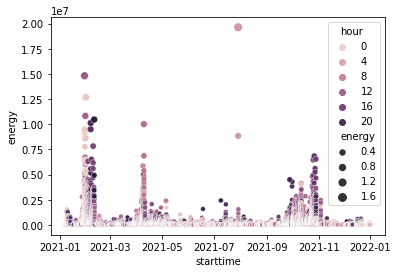

In [ ]:
duration = EarthQuakeCleanTime['duration ']

sns.scatterplot(x='starttime',y='energy', size = 'energy', hue = 'hour',data=EarthQuakeCleanTime)

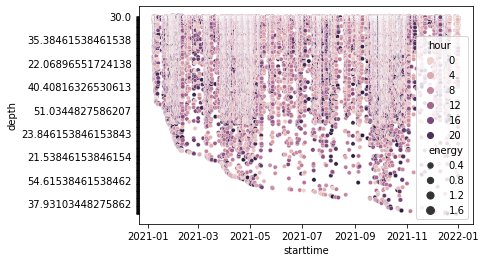

In [ ]:
EarthQuakeCleanTime = EarthQuakeCleanTime.astype({"depth": str})

g = sns.scatterplot(x='starttime',y='depth', size = 'energy', hue = 'hour',data=EarthQuakeCleanTime)

plt.rcParams['figure.figsize'] = [30, 20] 

for i, label in enumerate(g.get_yticklabels()):
    if i % 50 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

In [ ]:
curMon = EarthQuakeCleanTime.groupby('month')
mFilt = EarthQuakeCleanTime[EarthQuakeCleanTime['month'] == "01"]
type(mFilt)
mFilt.dtypes
print("\n")
curDay = mFilt.groupby('day')
type(curDay)
print(curDay)

month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

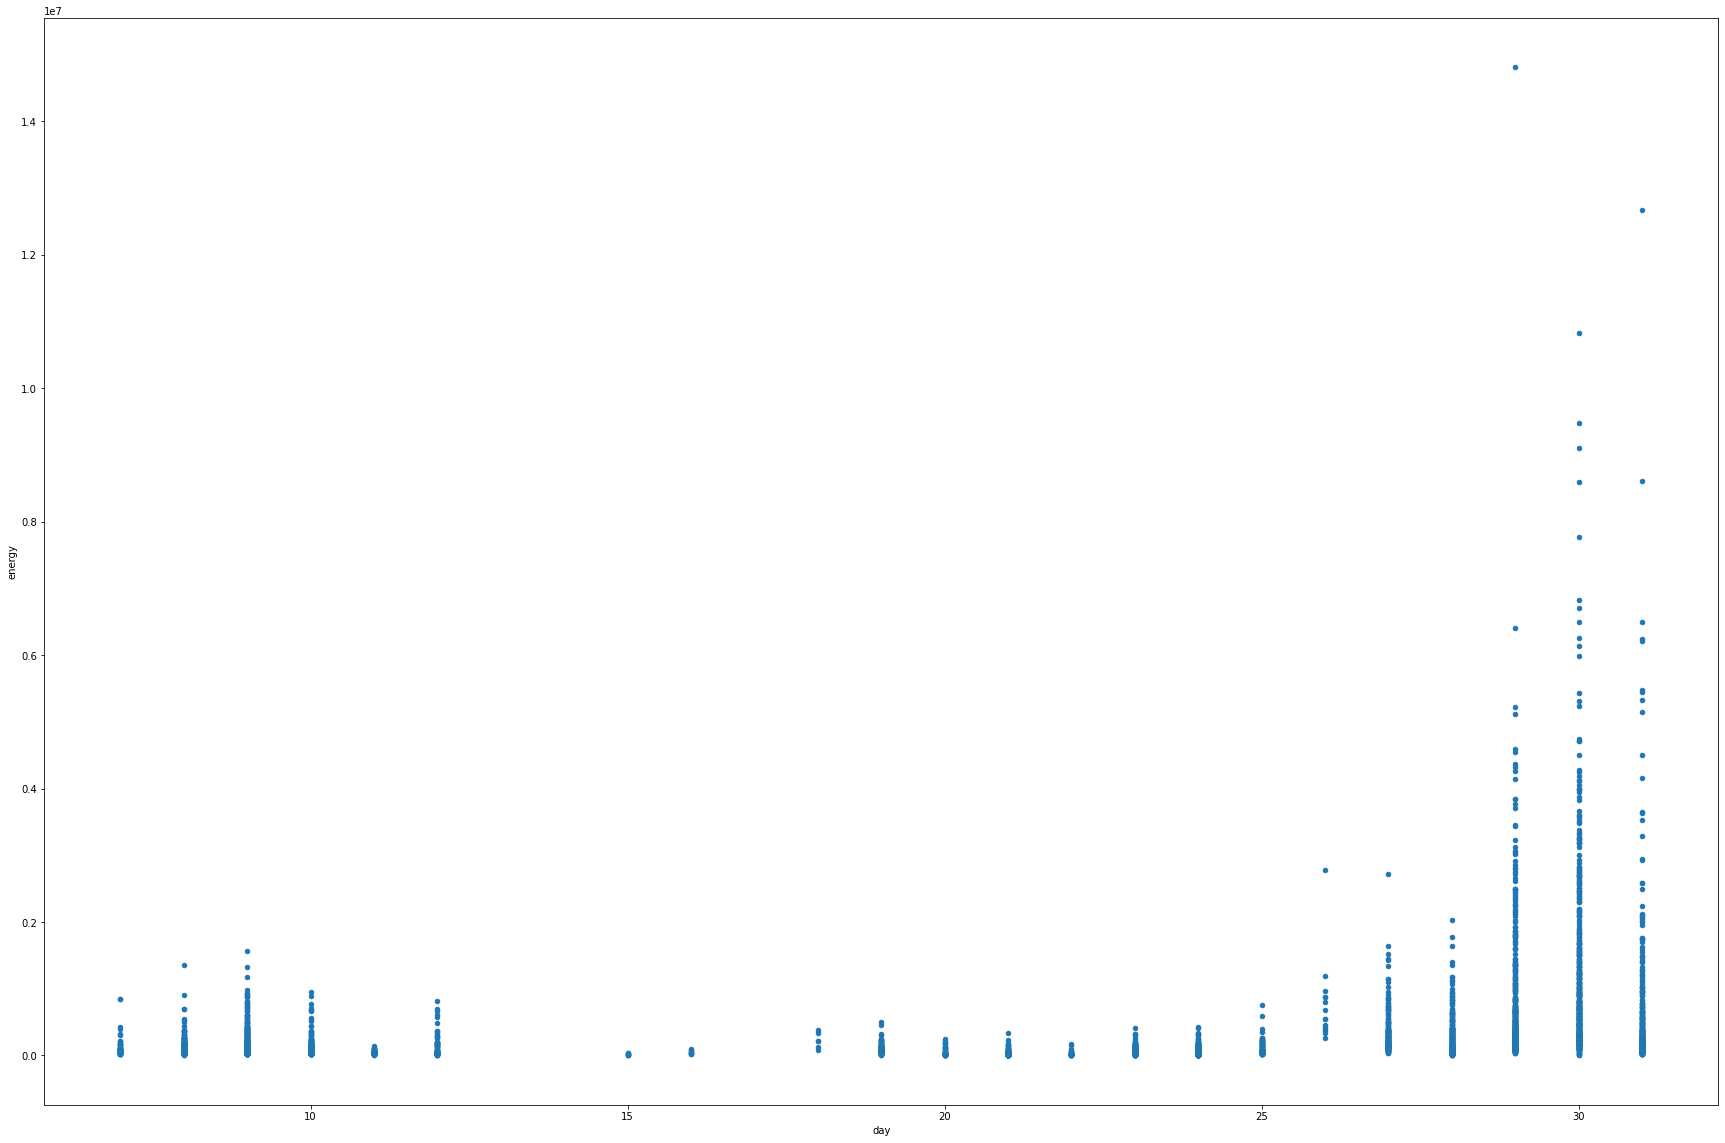

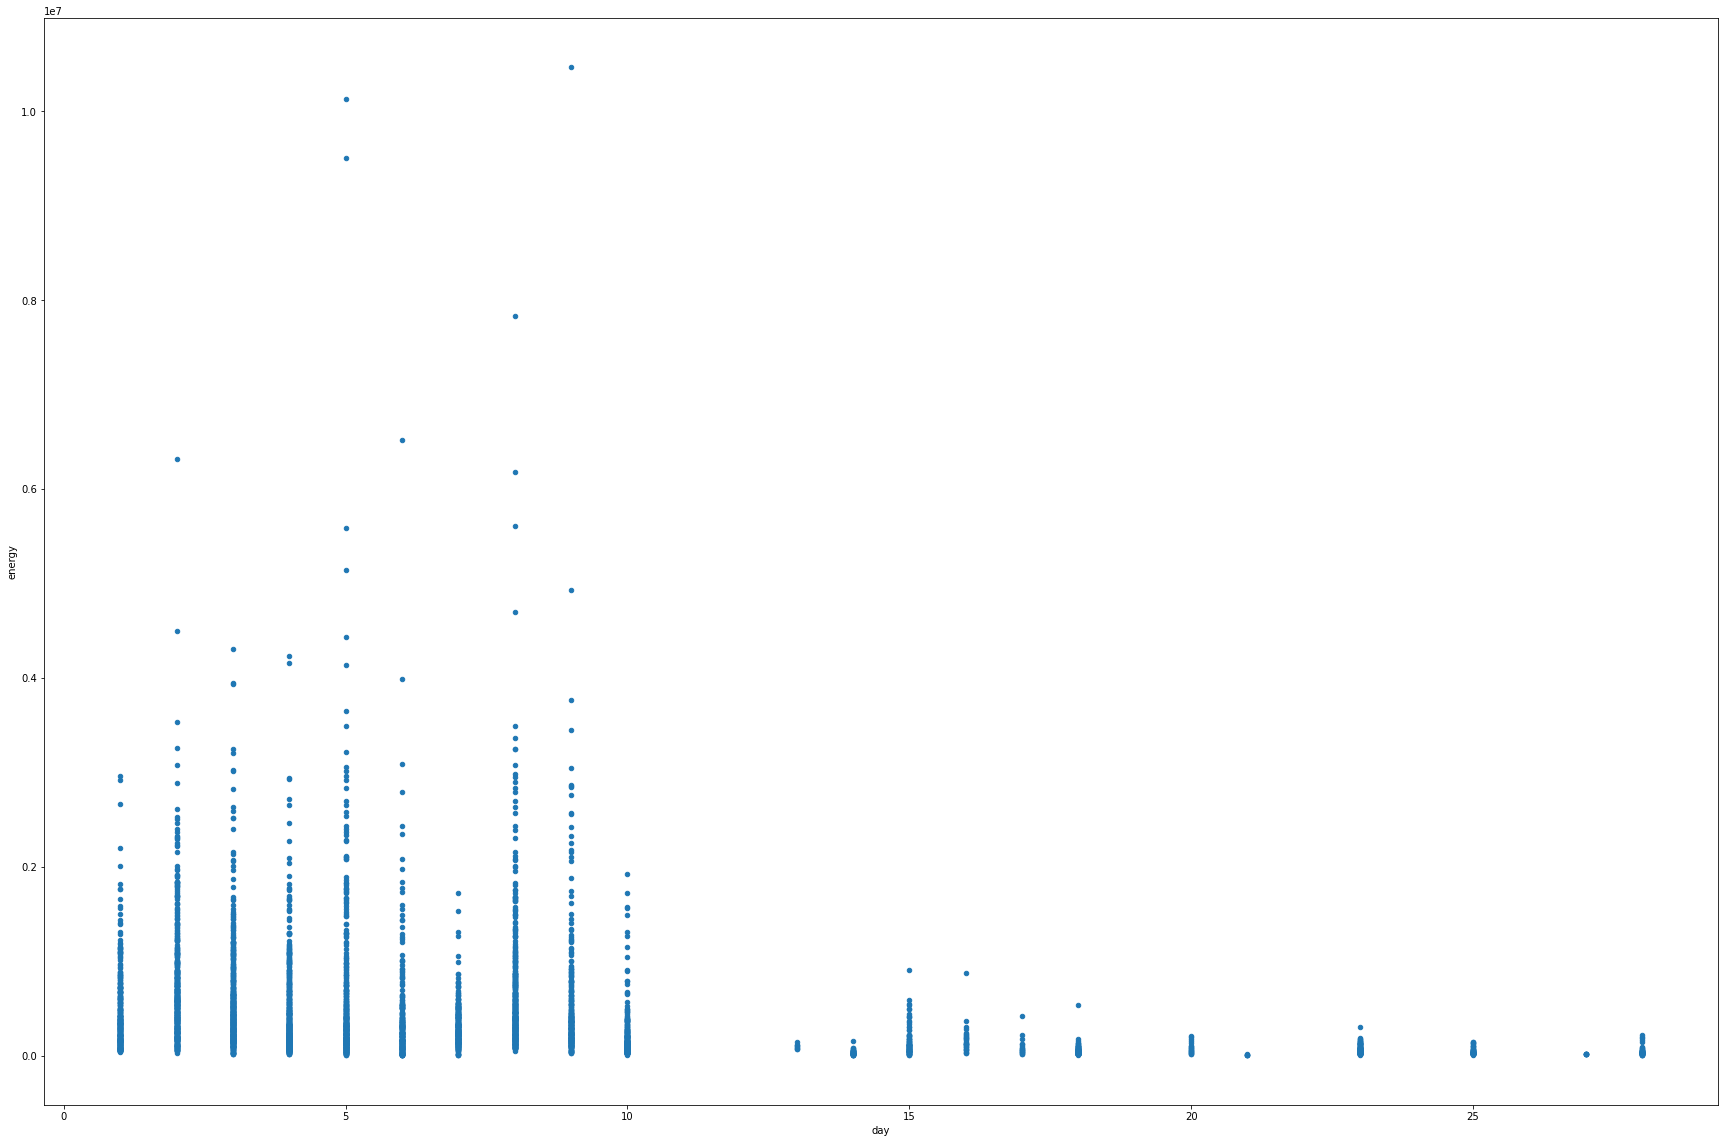

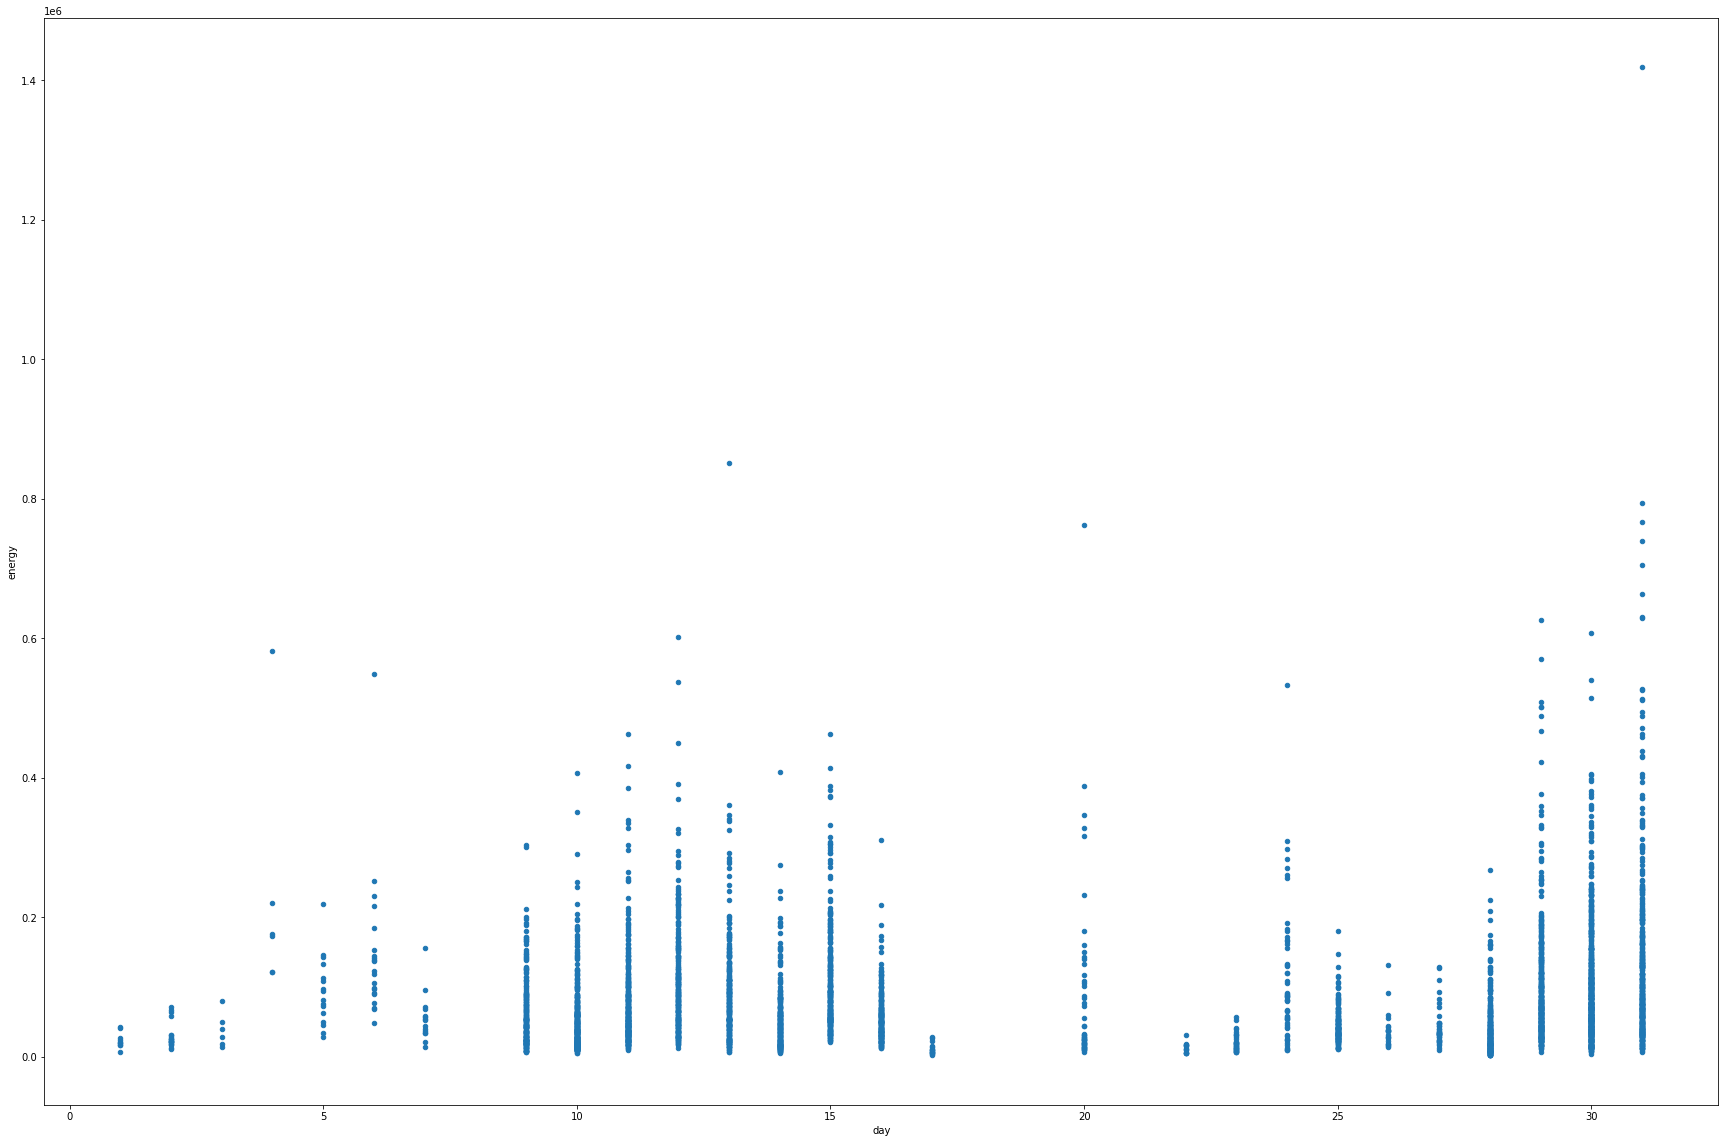

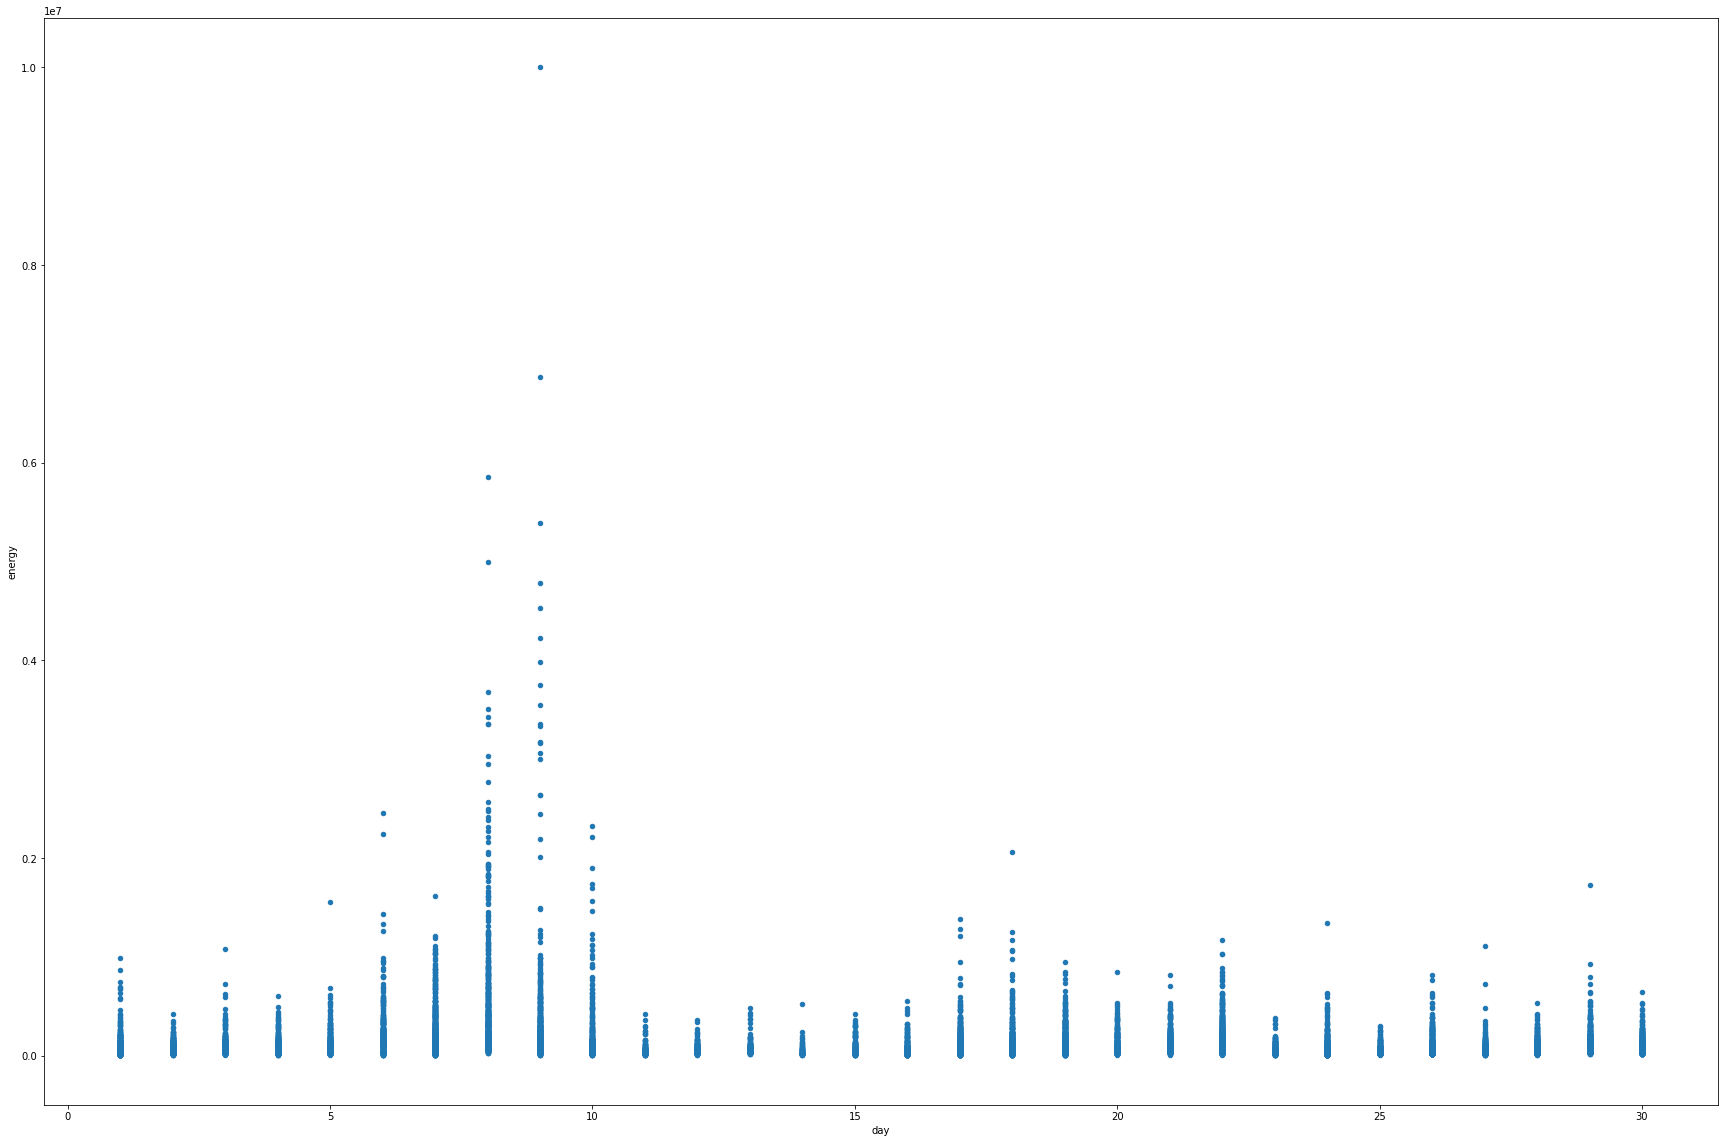

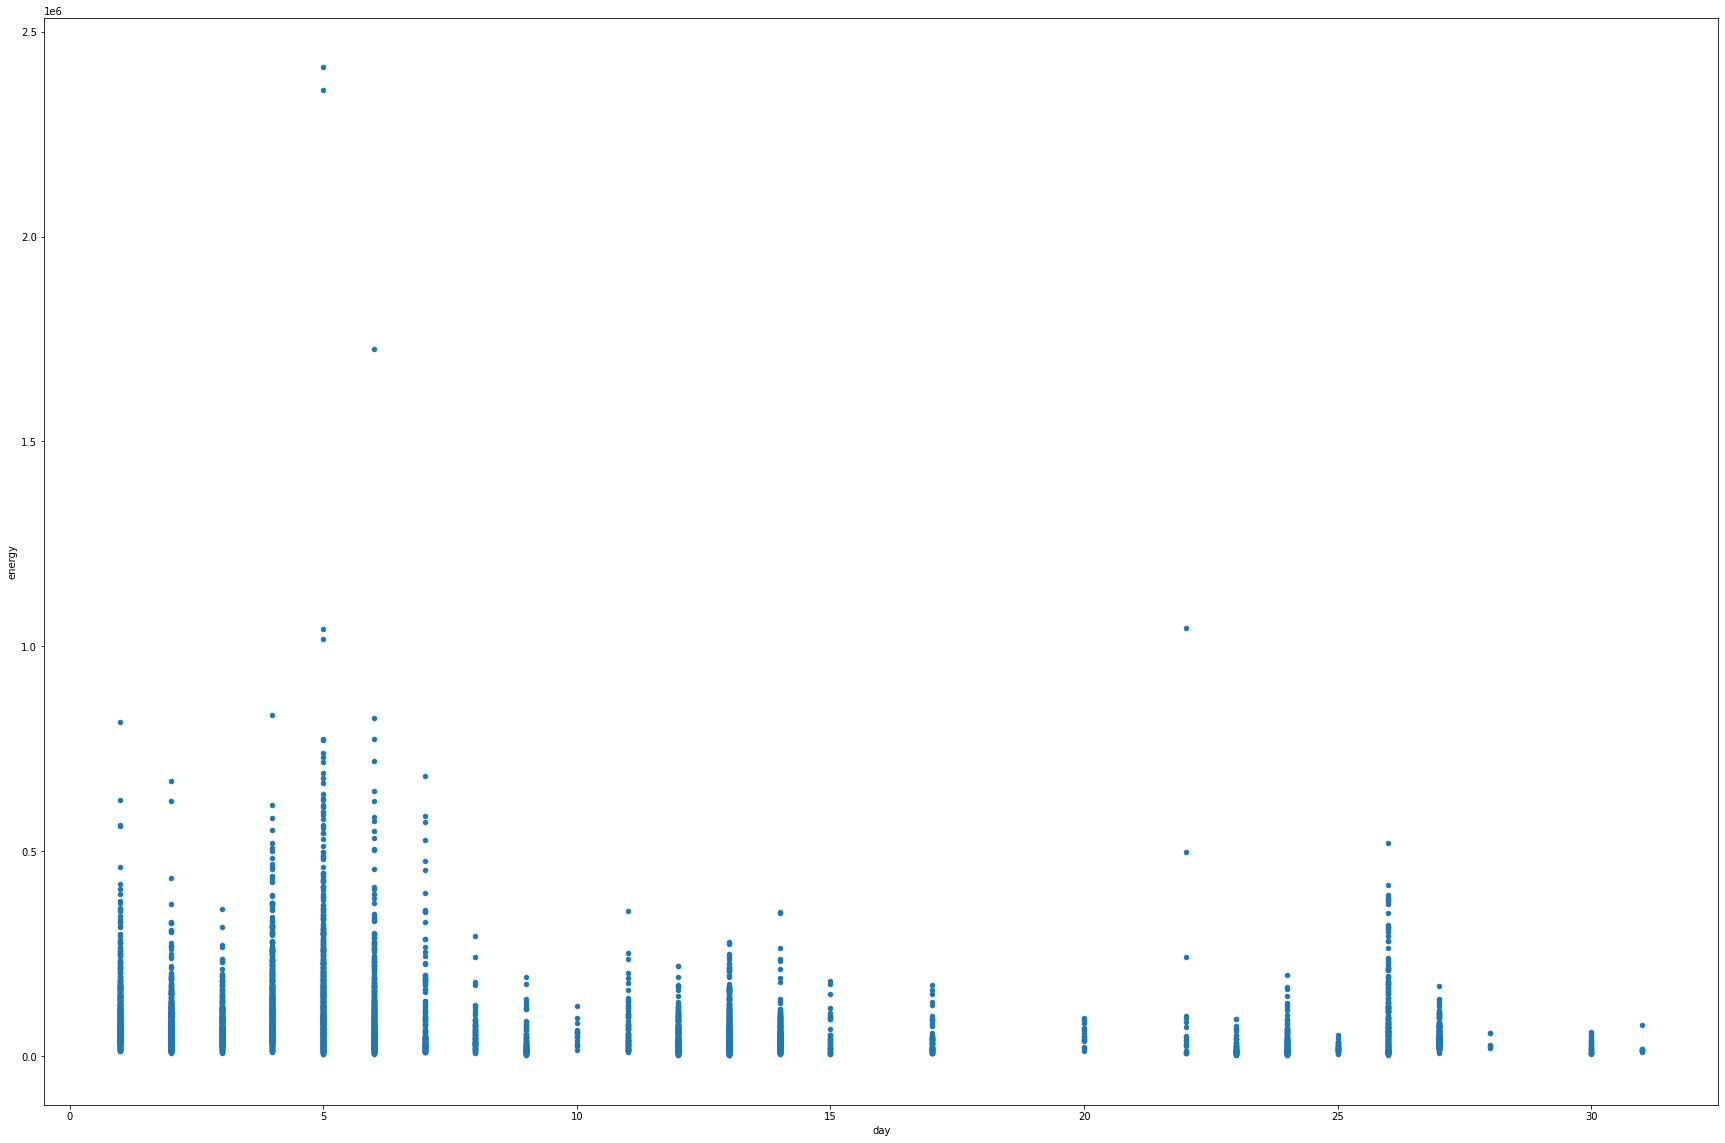

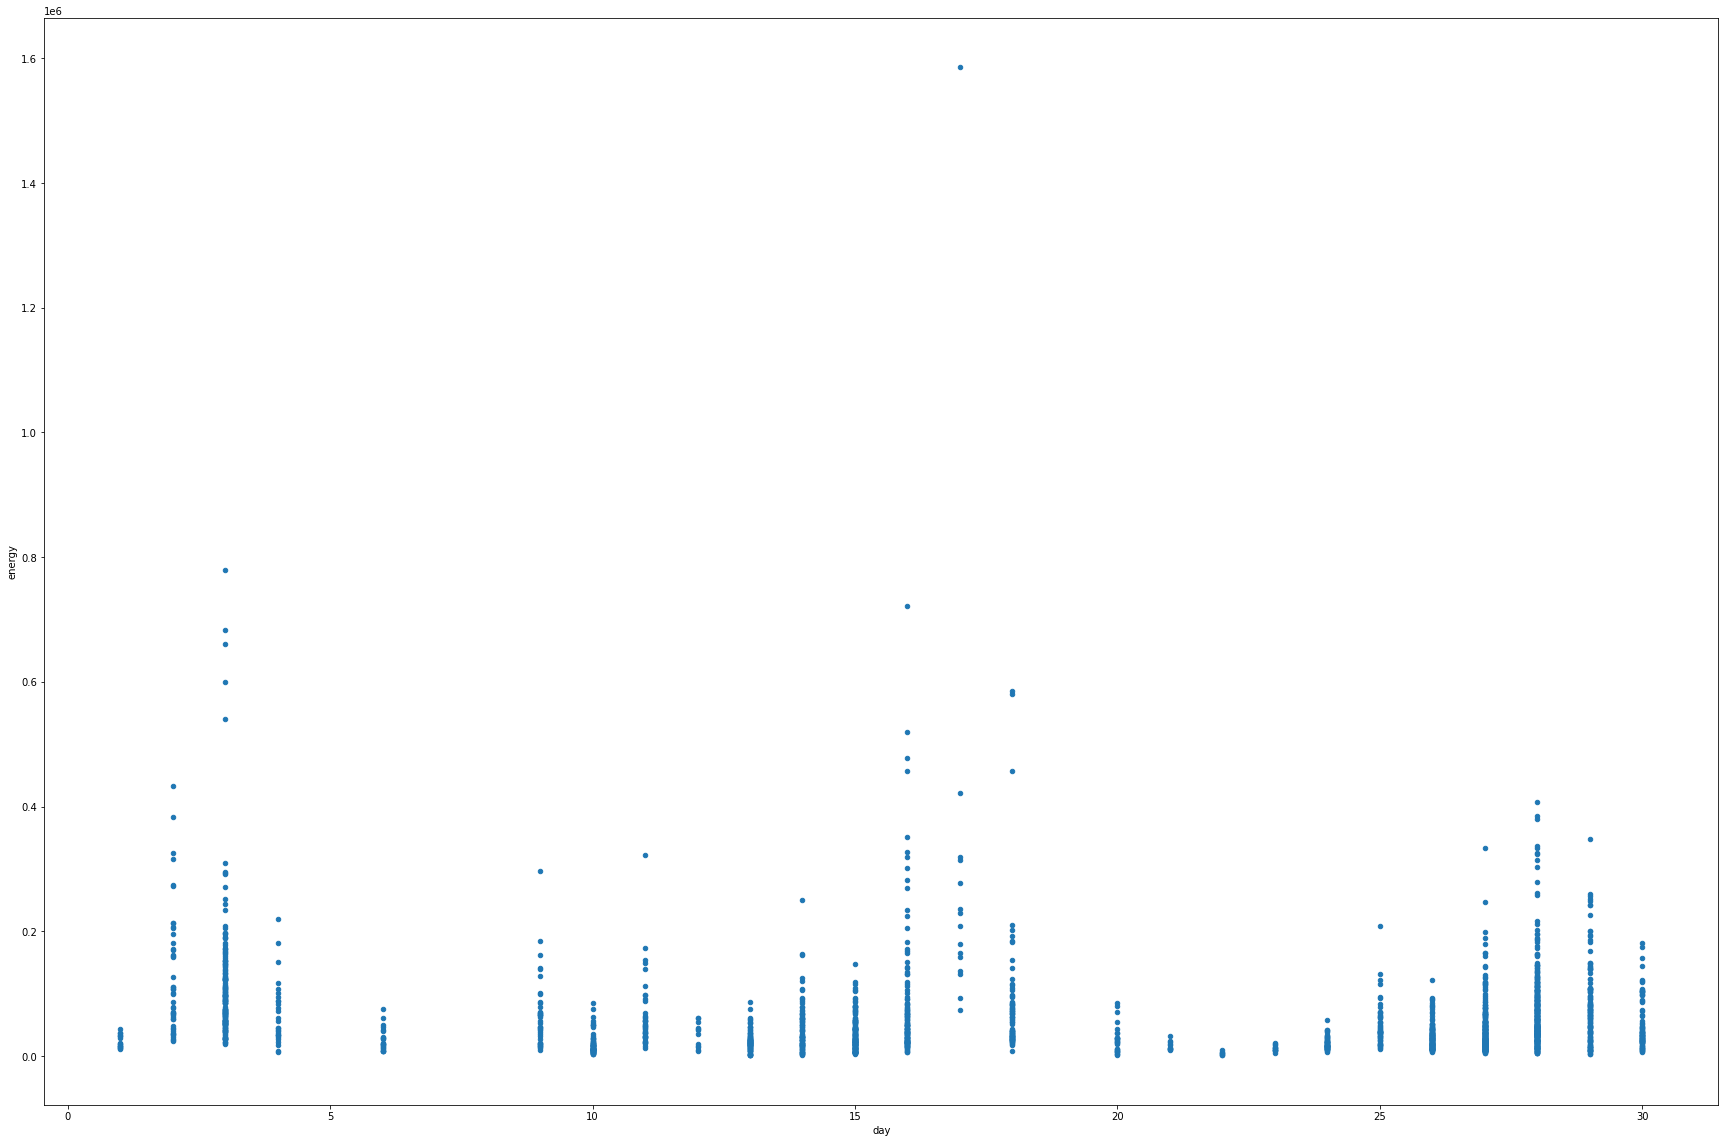

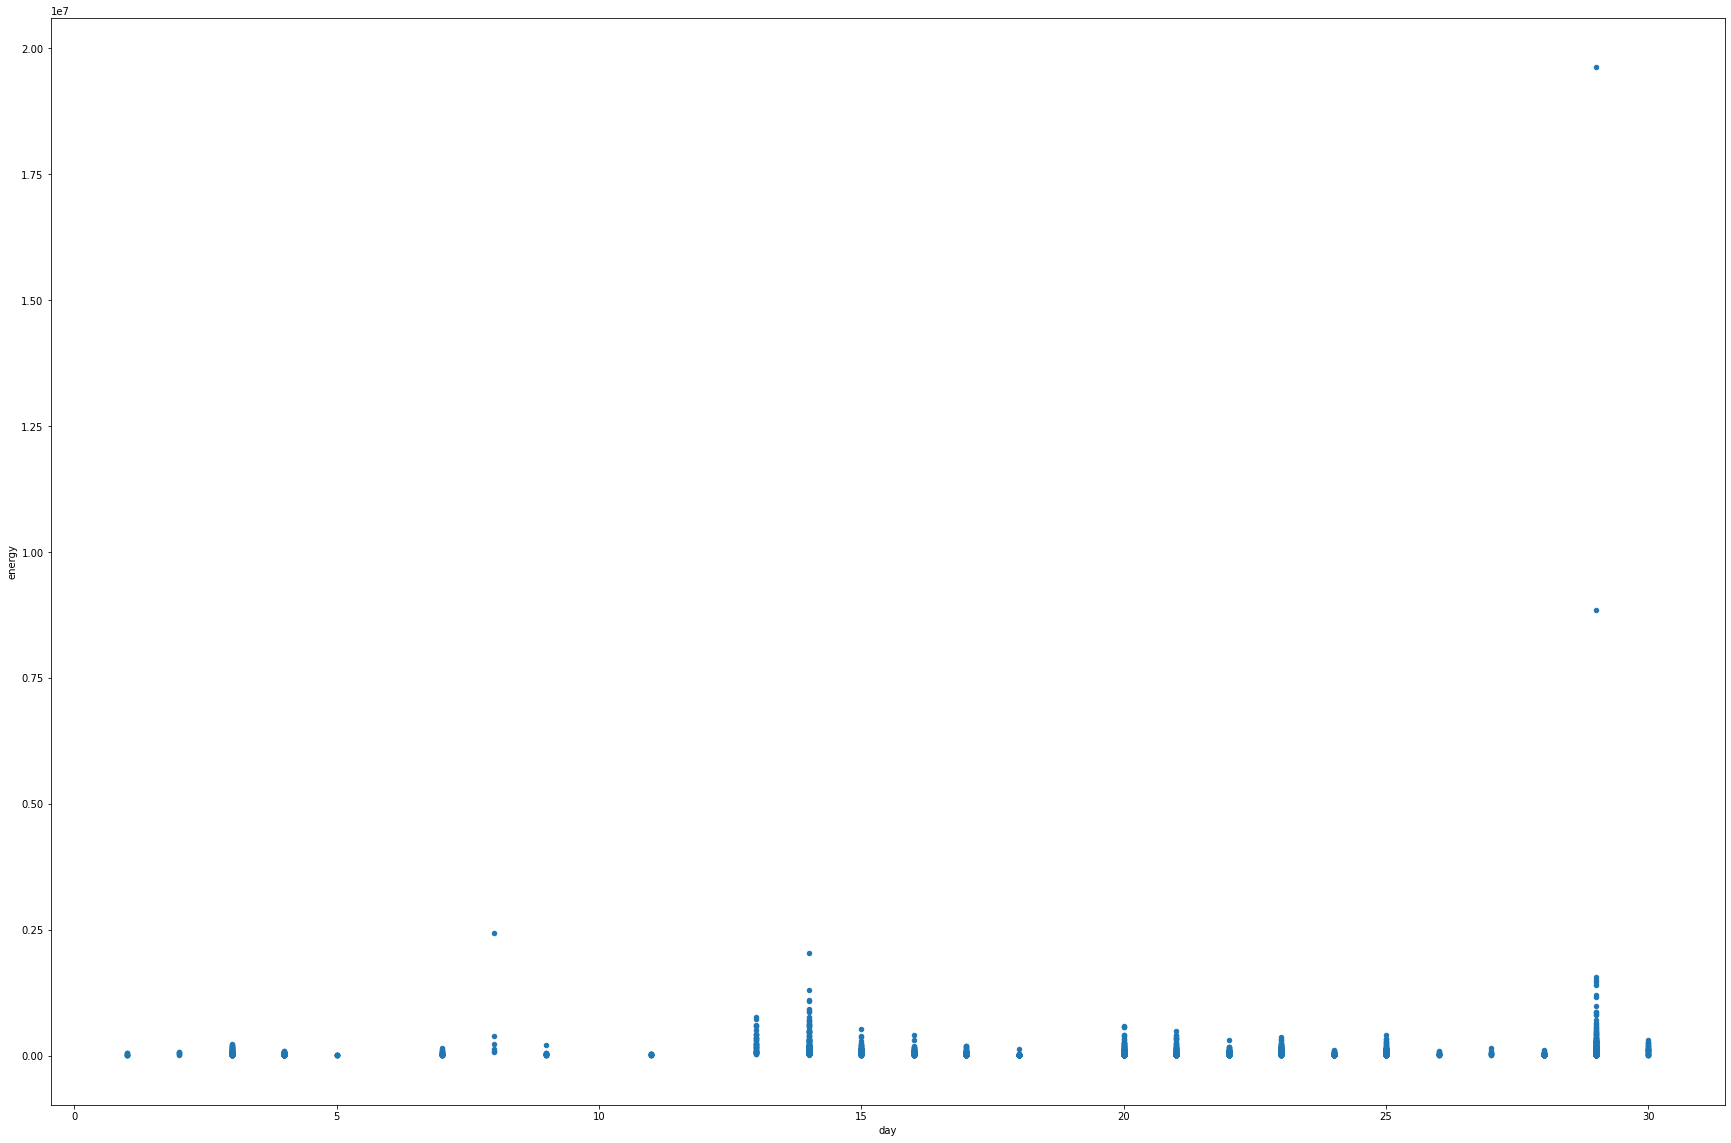

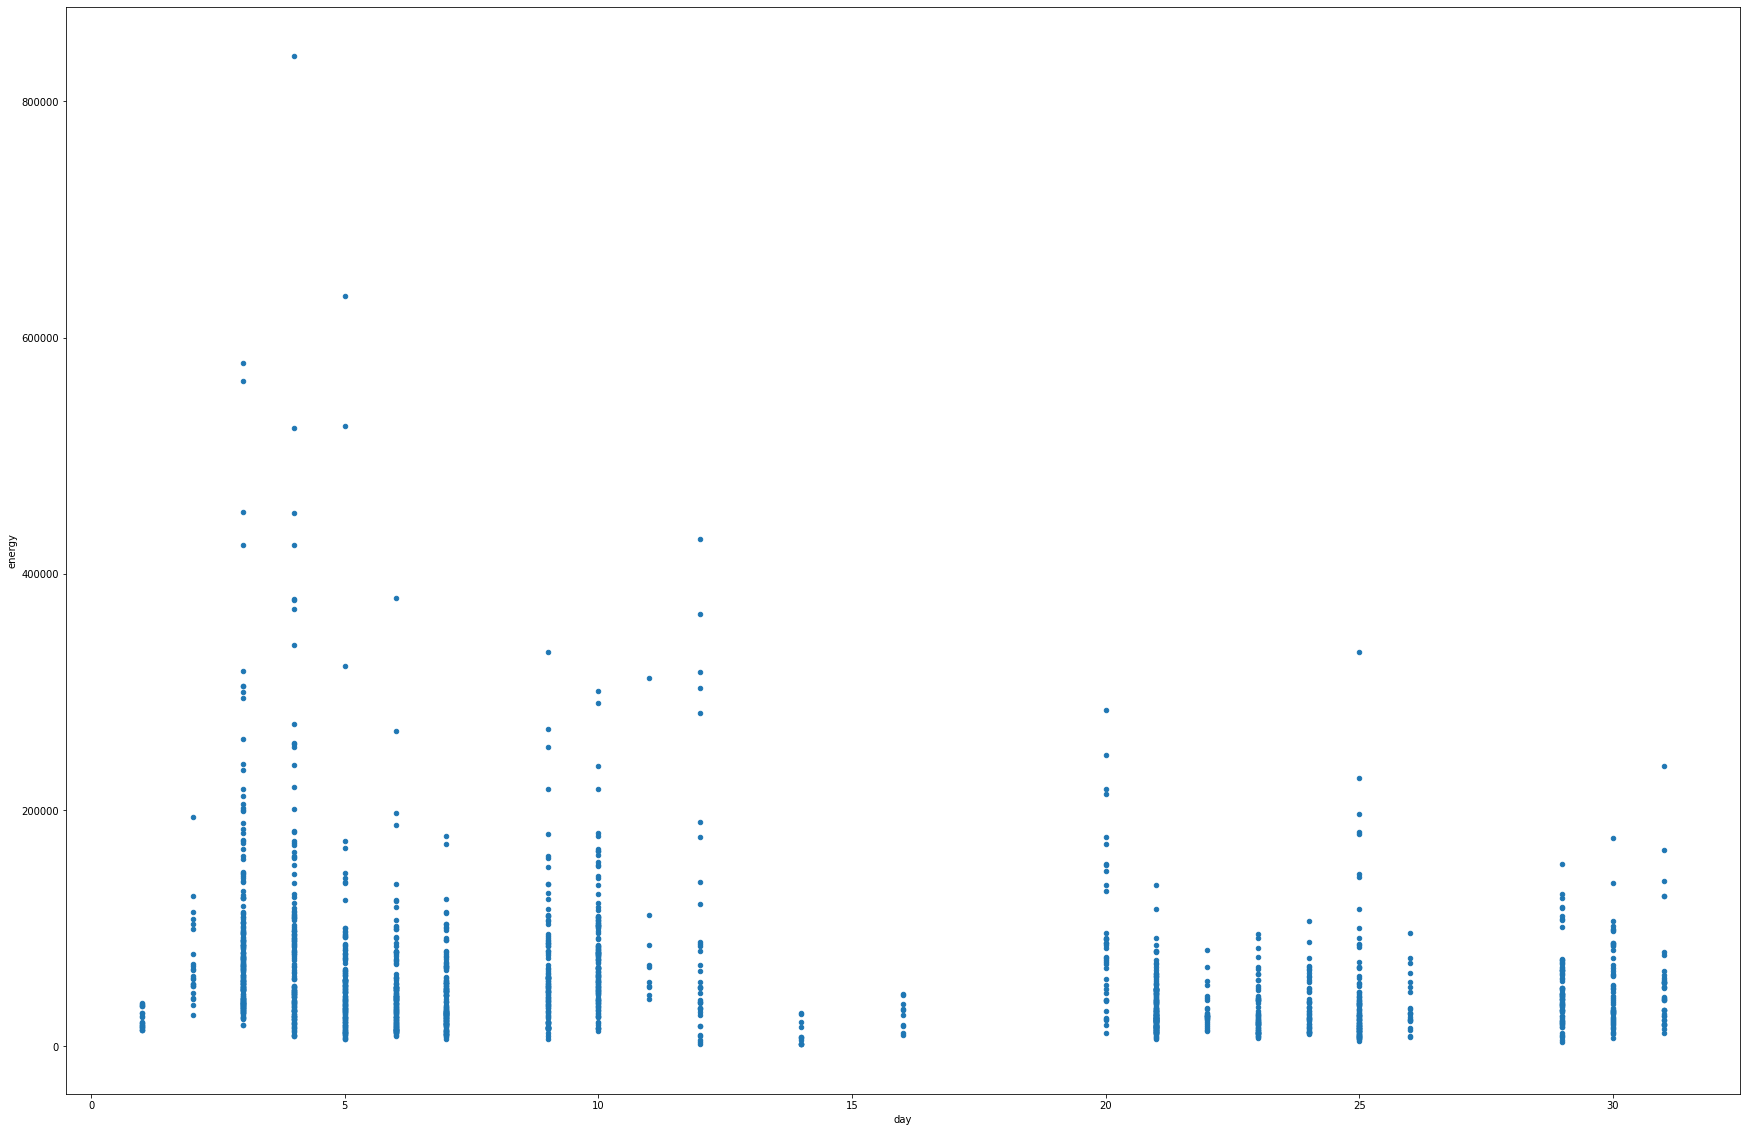

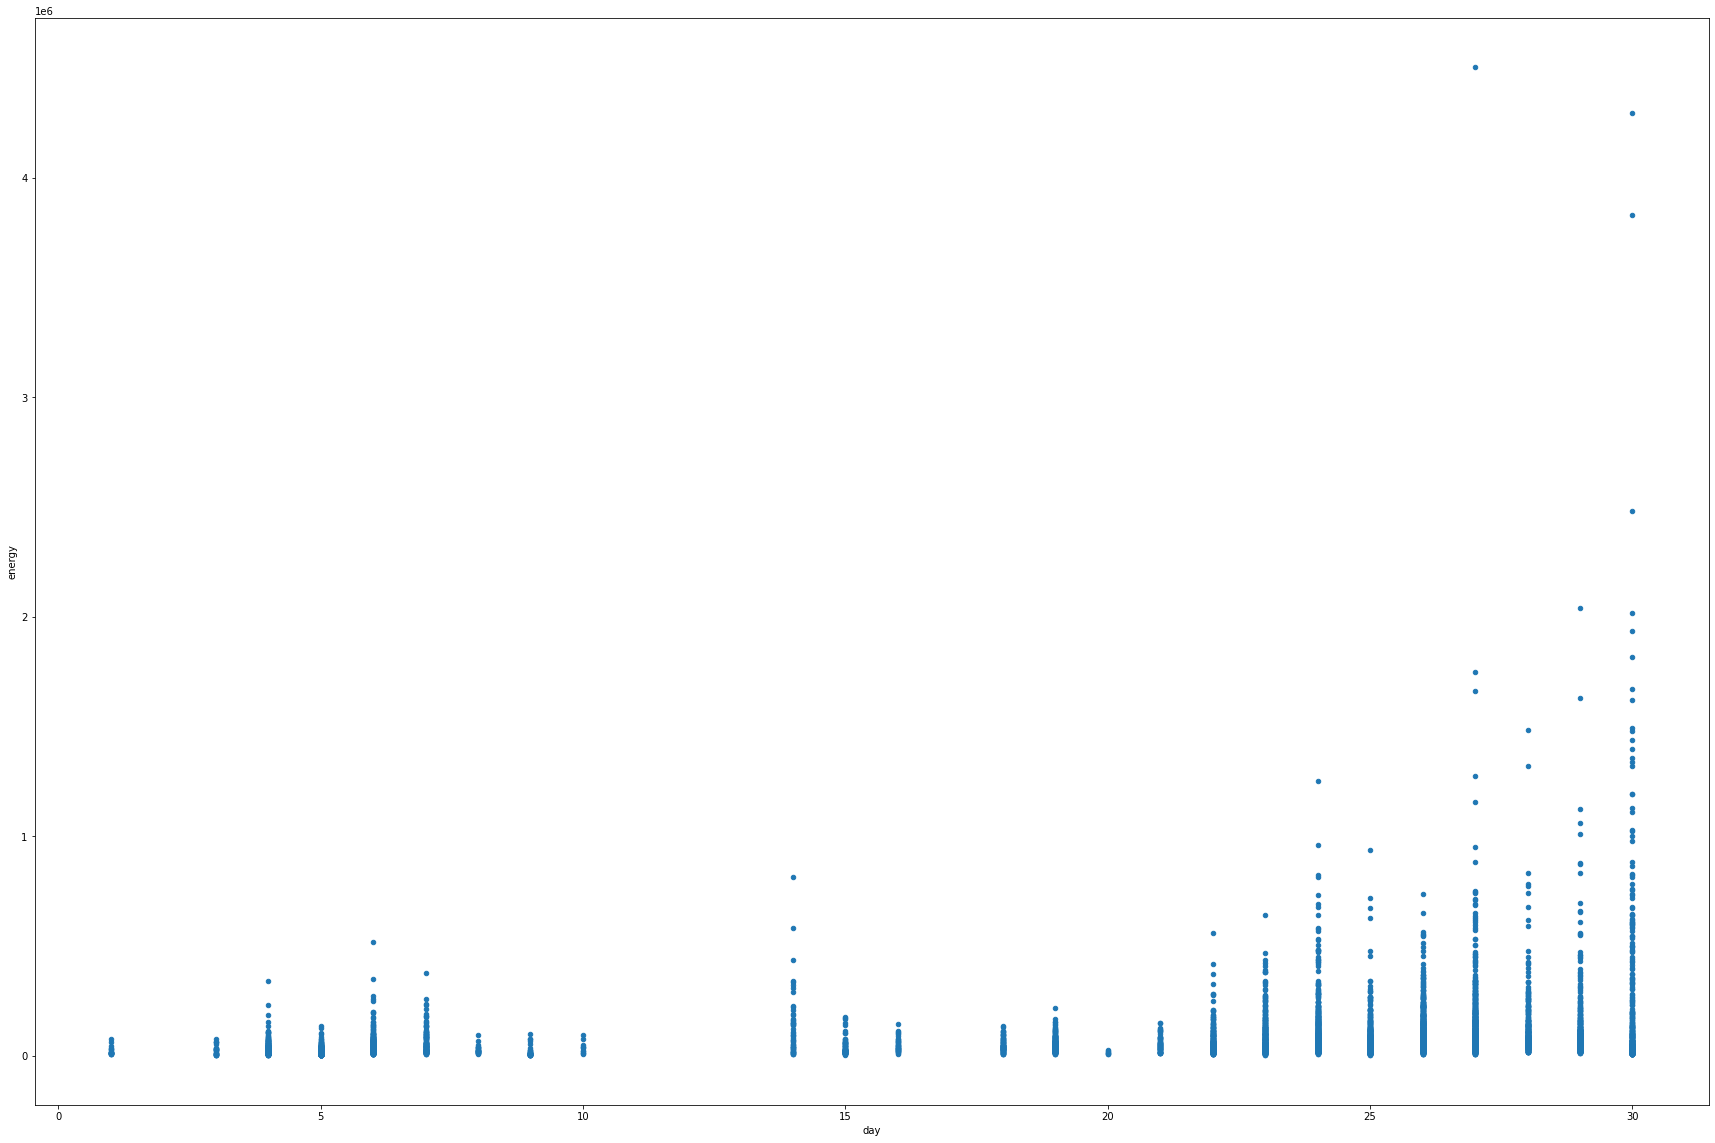

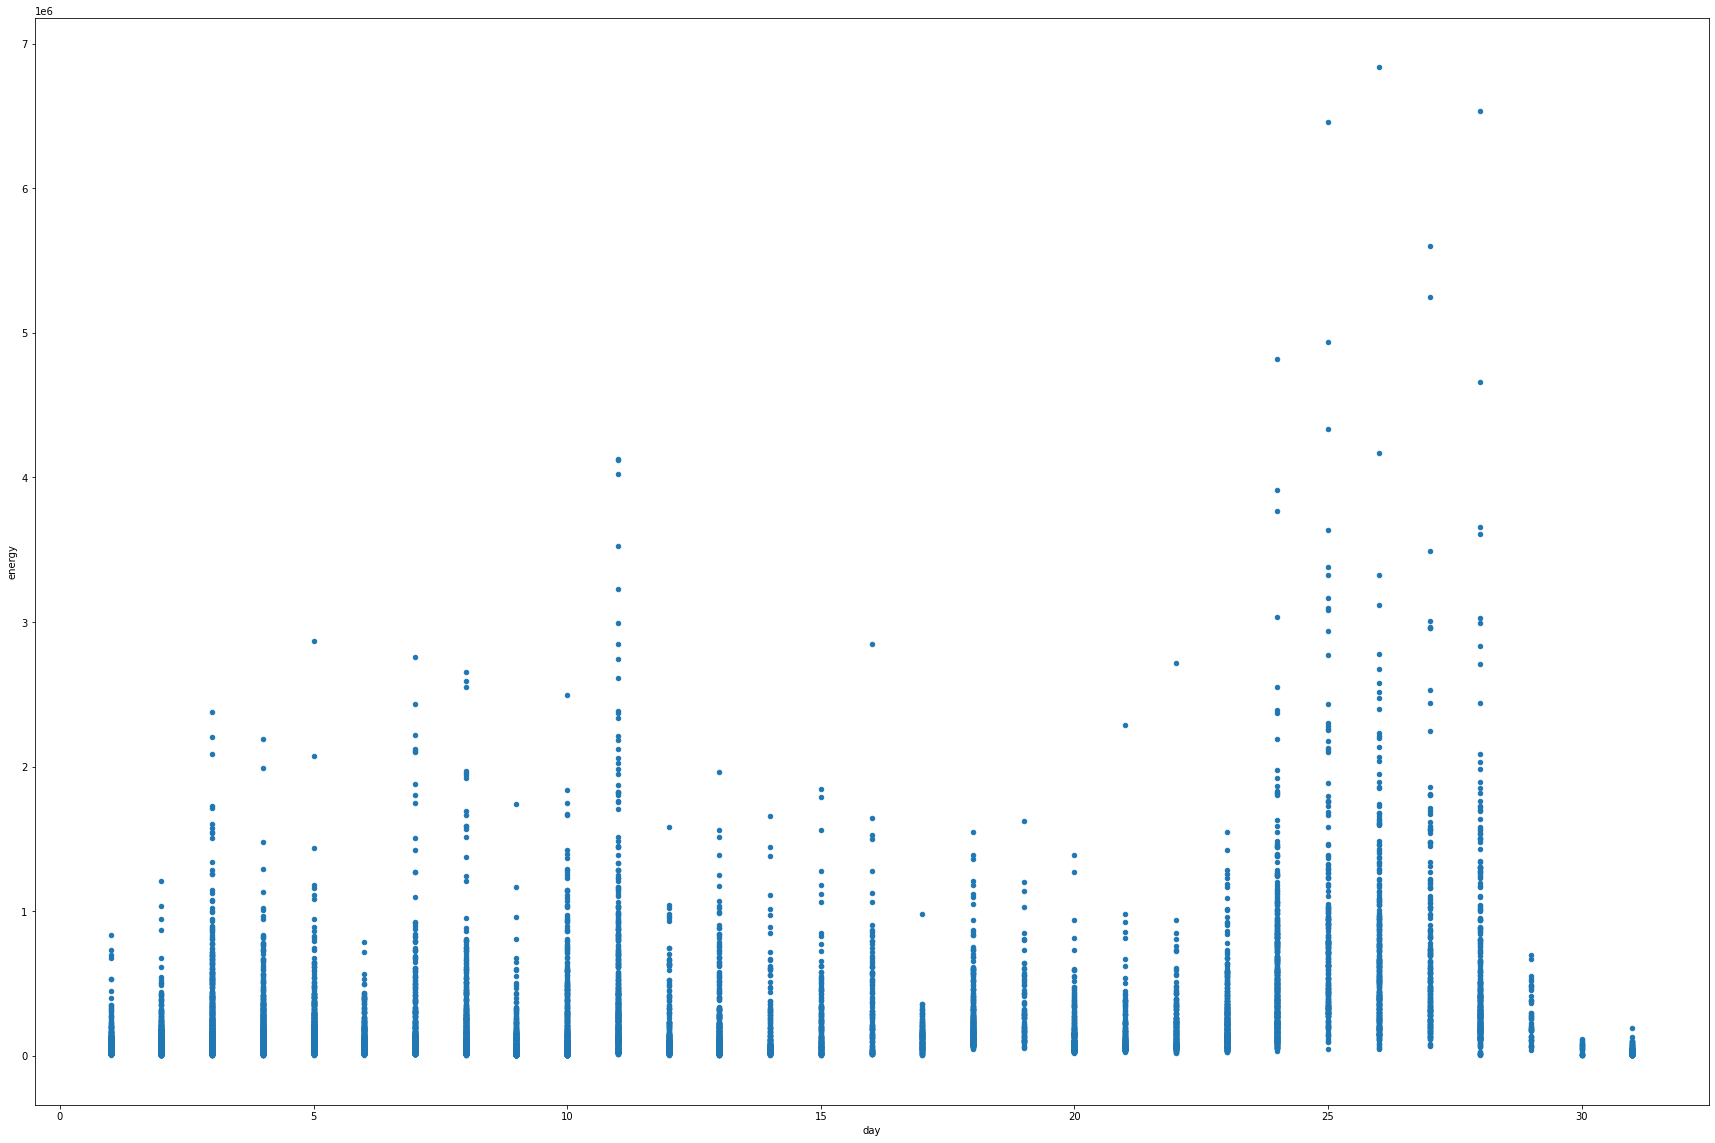

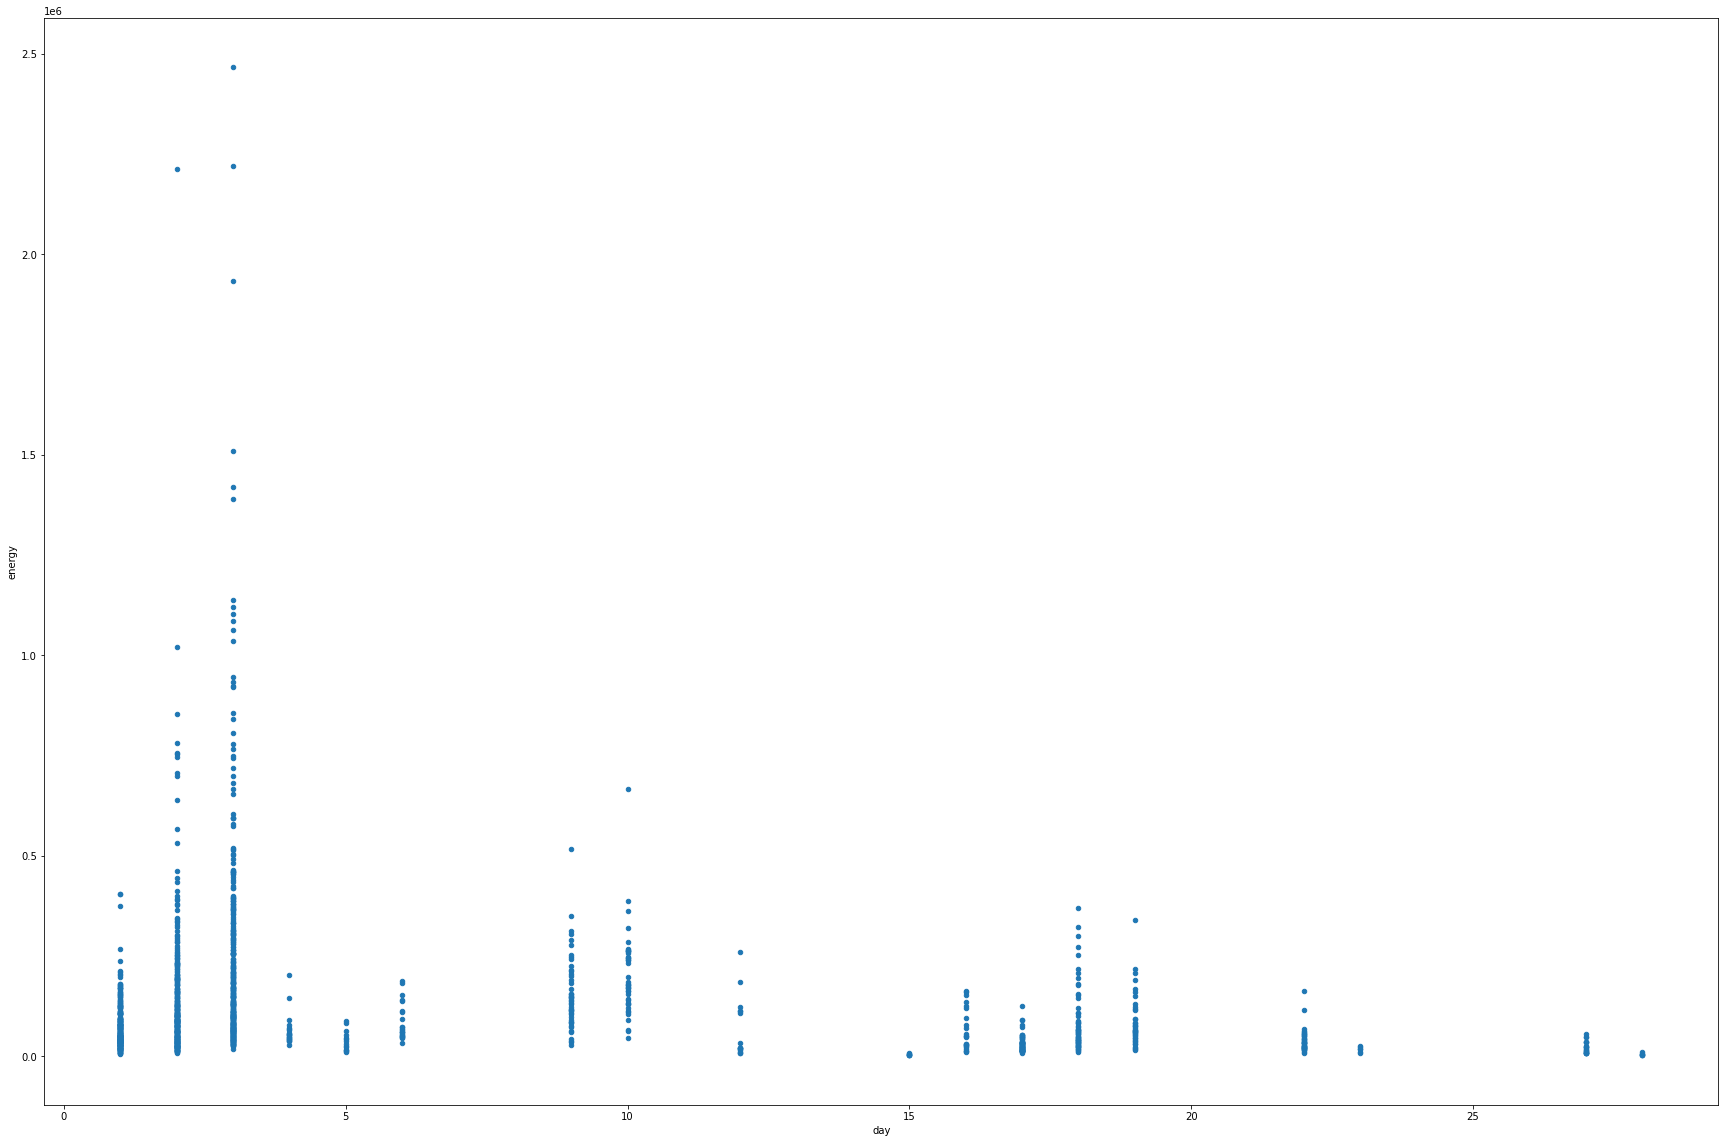

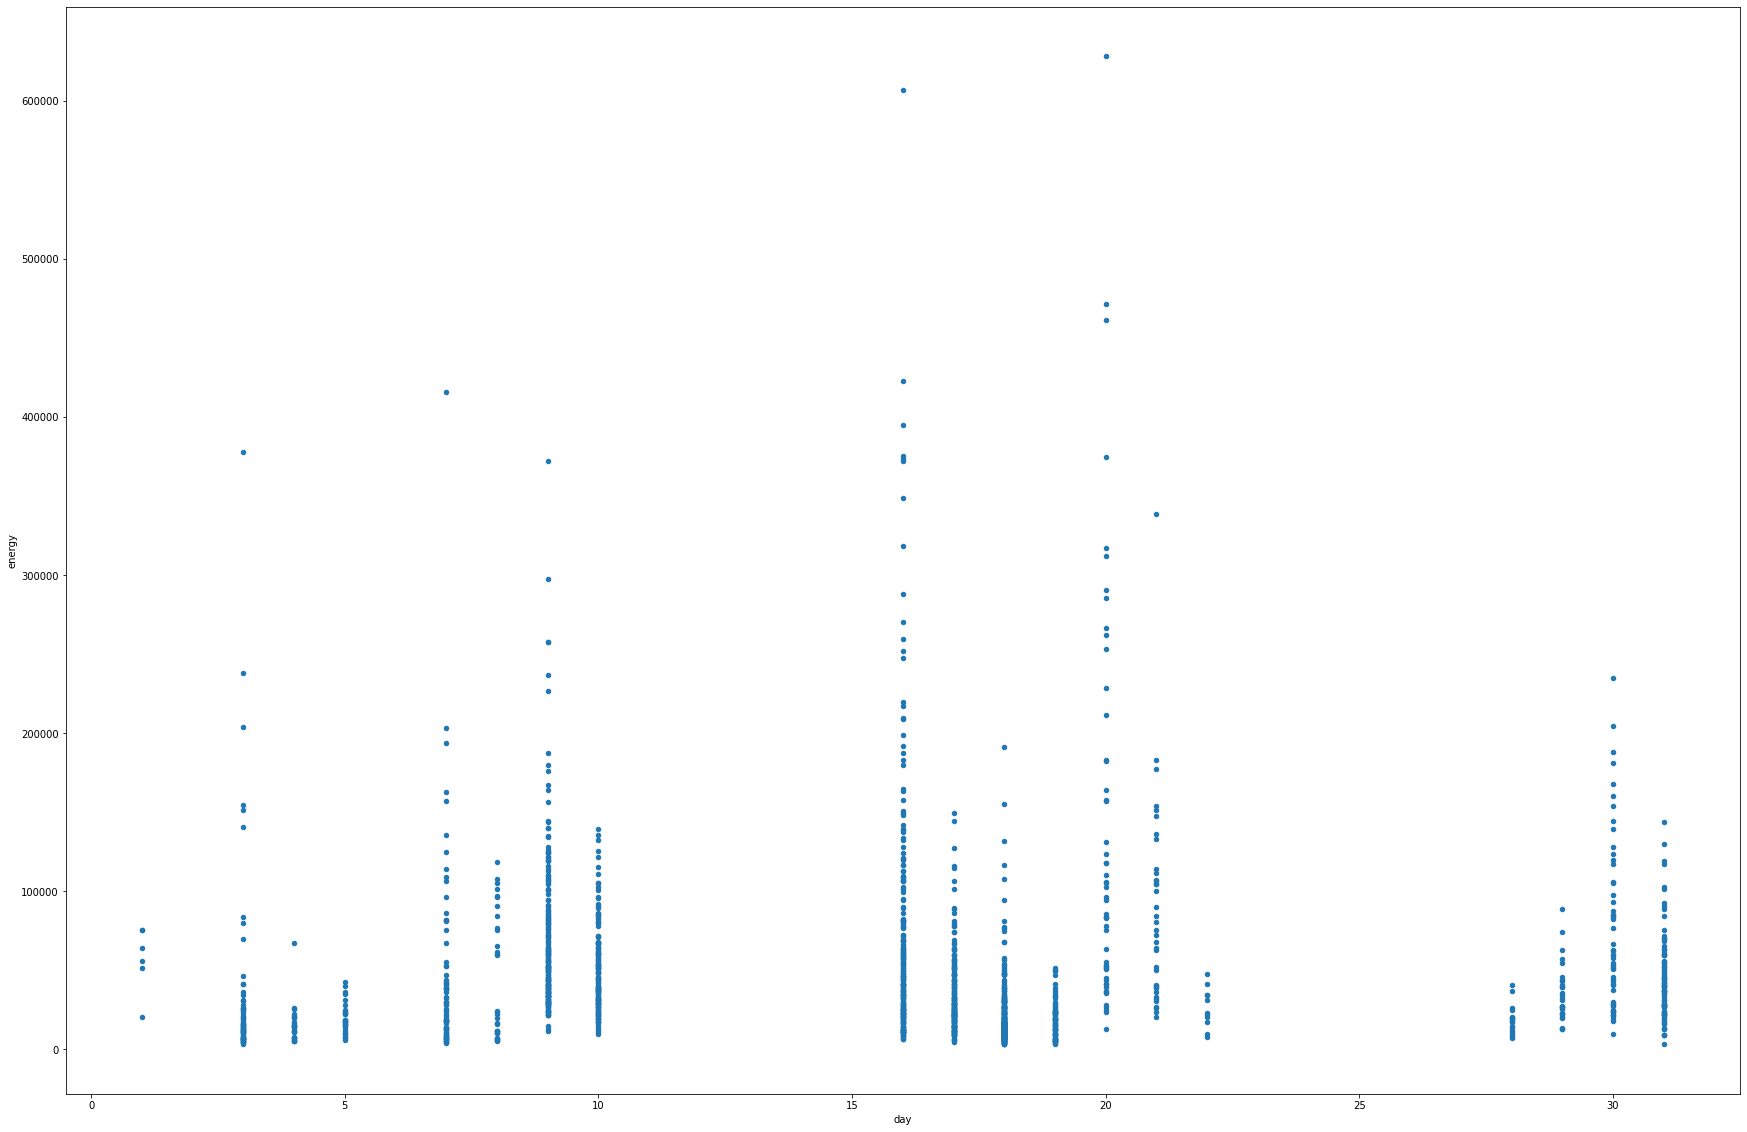

In [ ]:
curMon.dtypes
# sns.histplot(x='starttime',y='energy', data=curMon)
# type(curatedYear.duration())
curMon.plot(x = 'day', y = 'energy', kind = "scatter")